<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0622_%ED%8A%B9%EC%84%B1%EA%B3%B5%ED%95%99%2C_%EA%B7%9C%EC%A0%9Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PolynomialFeatures(degree:몇 차원인지)

In [13]:
x_sample=np.array([[1,2]])
pf=PolynomialFeatures(degree=2,include_bias=False)
pf.fit(x_sample)
xt=pf.transform(x_sample)
xt

array([[1., 2., 1., 2., 4.]])

In [15]:
x2=np.array([[3,4]])
xt=pf.transform(x2)
xt

array([[ 3.,  4.,  9., 12., 16.]])

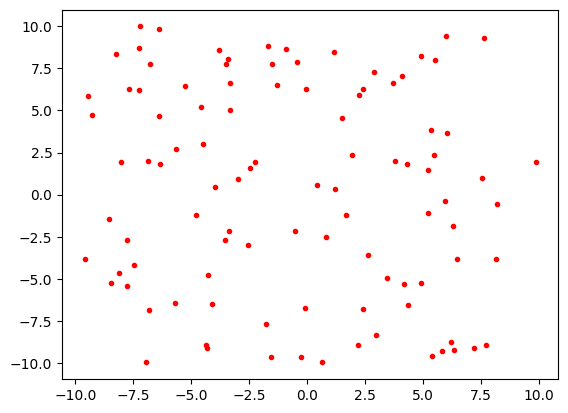

In [17]:
x=np.array([[np.random.uniform(-10,10),np.random.uniform(-10,10)]for _ in range(100)])
plt.plot(x[:,0],x[:,1],'r.')
plt.show()

In [18]:
x_1 = x[:,0]
x_2 = x[:,1]
y = 2*(x_1**2)+3*(x_1*x_2)+4*x_1+2.3*x_2-3.5*(x_2**2)+7 + np.random.uniform(-100,100,size=(100))

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xt=pf.transform(x)
x_train,x_test,y_train,y_test=train_test_split(xt,y)

In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

# Ridge

In [52]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [25]:
path='/content/drive/MyDrive/python_basic/data/boston_house.csv'

In [27]:
df=pd.read_csv(path)
label = df['Target']
data = df.drop(['Target'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(data,label)

In [36]:
ridge = Ridge()
ns = cross_val_score(ridge, data, label, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * ns)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(ns, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-11.711 -23.583 -29.693 -80.23  -31.116]
 5 folds 의 개별 RMSE scores :  [3.422 4.856 5.449 8.957 5.578]
 5 folds 의 평균 RMSE : 5.653 


In [34]:
ns

array([-11.7110334 , -23.58316804, -29.69339407, -80.22988232,
       -31.11617767])

In [38]:
alphas = [0,0.01,0.1,1,10,100,1000]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(x_train ,y_train ) #모델 학습
    pred = ridge.predict(x_test) #예측
    print(f'alpha:{alpha} r2 score : {ridge.score(x_test, y_test)}')
    #print(ridge.coef_,ridge.intercept_)


alpha:0 r2 score : 0.7442687700532059
alpha:0.01 r2 score : 0.7442644451852898
alpha:0.1 r2 score : 0.7442029329188549
alpha:1 r2 score : 0.742884914554921
alpha:10 r2 score : 0.735465007209918
alpha:100 r2 score : 0.7034297738684587
alpha:1000 r2 score : 0.6204505878739573


In [42]:
params={'alpha' : [0,0.01,0.1,1,10,100,1000]}
ridge=Ridge()
gs=GridSearchCV(ridge,param_grid=params)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'alpha': 0.1}


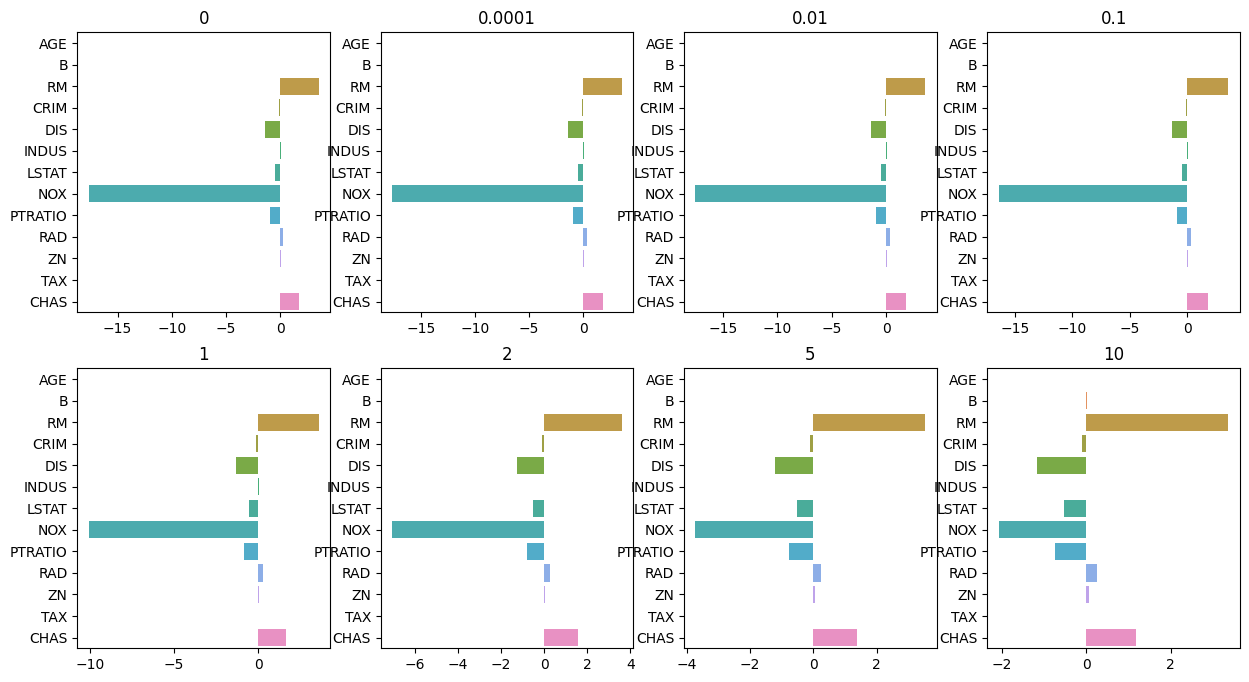

In [43]:
import seaborn as sns
alphas = [0,0.0001,0.01,0.1,1,2,5,10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for i,alpha in enumerate(alphas):
  nr = int(i/4)
  nc = i%4
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  cs = pd.Series(ridge.coef_,index=data.columns)
  rdf[str(alpha)] = cs
  sns.barplot(x=cs.values,y=cs.index,ax=axs[nr][nc])
  axs[nr][nc].set_title(str(alpha))
plt.show()

In [47]:
ss = StandardScaler()
ss.fit(data)
sd = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(sd,label)

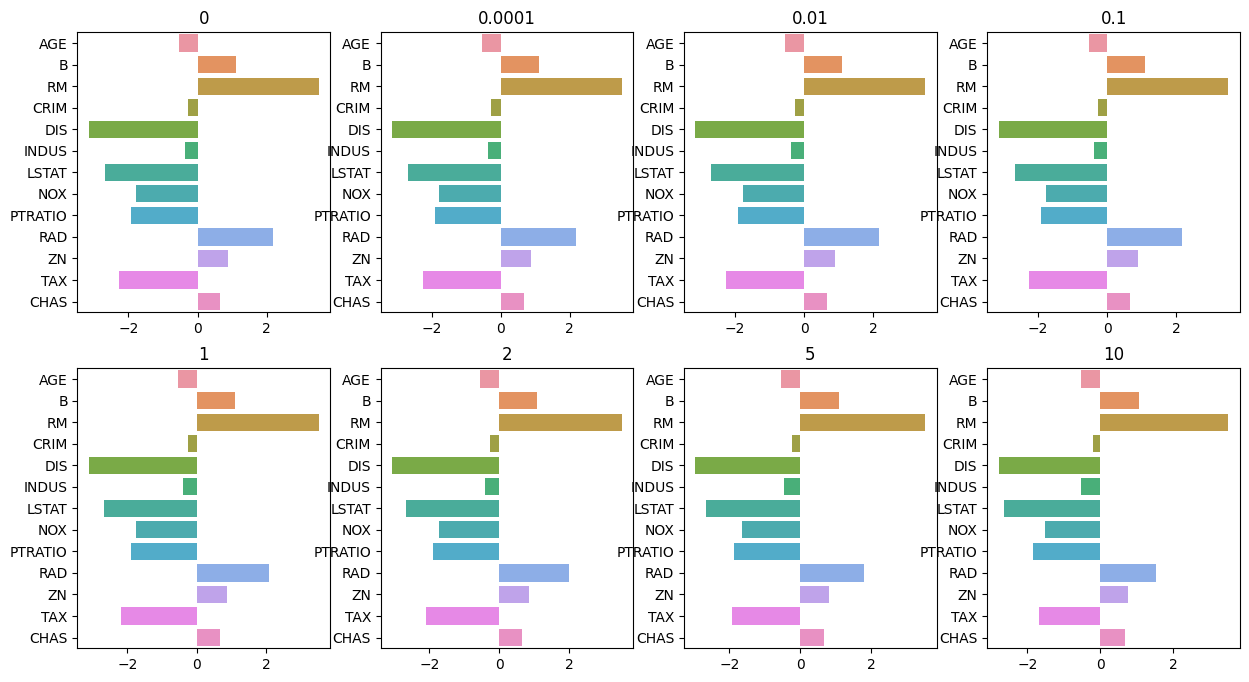

In [48]:
alphas = [0,0.0001,0.01,0.1,1,2,5,10]
rdf = pd.DataFrame()
_,axs = plt.subplots(nrows=2,ncols=4,figsize=(15,8))
for i,alpha in enumerate(alphas):
  nr = int(i/4)
  nc = i%4
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train,y_train)
  cs = pd.Series(ridge.coef_,index=data.columns)
  rdf[str(alpha)] = cs
  sns.barplot(x=cs.values,y=cs.index,ax=axs[nr][nc])
  axs[nr][nc].set_title(str(alpha))
plt.show()

In [53]:
alphas = [0.0001,0.01,0.1,1,2,5,10]

for alpha in alphas:
  model = Ridge(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))
print("\n===================")
for alpha in alphas:
  model = Lasso(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))
print("\n===================")
for alpha in alphas:
  model = ElasticNet(alpha=alpha)
  sc = cross_val_score(model,x_train,y_train,cv=5)
  print(f'{alpha:7.4f}',np.mean(sc))

 0.0001 0.7263644762285939
 0.0100 0.7263667554089073
 0.1000 0.7263871904133594
 1.0000 0.7265655047957307
 2.0000 0.7267161017352081
 5.0000 0.7269554637795748
10.0000 0.7269363889211697

 0.0001 0.7263633274912717
 0.0100 0.7261782948117619
 0.1000 0.7186388733074907
 1.0000 0.6760134166663999
 2.0000 0.620050099735684
 5.0000 0.3068464180286072
10.0000 -0.0035521864006676563

 0.0001 0.7263673317025487
 0.0100 0.7265216678366048
 0.1000 0.722886963649043
 1.0000 0.6619693469006819
 2.0000 0.5855077865912183
 5.0000 0.3495160975870416
10.0000 0.0831216070387085


In [54]:
print("\n=======Ridge============")
for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)
print("\n========Lasso===========")
for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)
print("\n========ElasticNet===========")
for alpha in alphas:
  model = ElasticNet(alpha=alpha)
  model.fit(x_train,y_train)
  print(f'{alpha:7.4f}',model.coef_)


=======Ridge============
 0.0001 [-0.53943966  1.10119859  3.51043045 -0.27539349 -3.14412747 -0.37271506
 -2.68005343 -1.77582633 -1.91252815  2.1779034   0.88556058 -2.26272239
  0.65992141]
 0.0100 [-0.53942097  1.10117382  3.51047474 -0.2752837  -3.1437189  -0.37295429
 -2.68001185 -1.77550239 -1.91243102  2.17700899  0.88538931 -2.26187813
  0.65994345]
 0.1000 [-0.53925038  1.10094849  3.51087355 -0.27429047 -3.14001028 -0.37511868
 -2.67963458 -1.77256379 -1.91155007  2.16891162  0.88383778 -2.25423769
  0.6601426 ]
 1.0000 [-0.53747351  1.09867757  3.51449466 -0.26482314 -3.1034696  -0.395771
 -2.67592479 -1.74379273 -1.90293631  2.09113505  0.86884291 -2.18111661
  0.66201518]
 2.0000 [-0.53536583  1.09611975  3.51779326 -0.2552232  -3.06399475 -0.41677726
 -2.67192158 -1.71307679 -1.89375716  2.0109987   0.85321443 -2.10630421
  0.6638644 ]
 5.0000 [-0.52842674  1.08826947  3.52385618 -0.23129272 -2.9521464  -0.46975351
 -2.66047015 -1.6280238  -1.86835726  1.80341383  0.811